In [450]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words()

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

## Process Data ##

In [28]:
#bring in corpus
with open('/Users/user/desktop/metis/projects/metis-project-5/data/data/cbt_train.txt', 'r') as f_in:
    entire = f_in.read()

In [31]:
#split into books
books = entire.split('_BOOK_TITLE_')

In [267]:
#make df
df = pd.DataFrame(books, columns =['Text']) 

In [268]:
df

,Text
0,
1,: Andrew_Lang___Prince_Prigio.txt.out\nCHAPTE...
2,": Andrew_Lang___Prince_Prigio_From_""His_Own_F..."
3,: Andrew_Lang___Prince_Ricardo_of_Pantouflia....
4,: Andrew_Lang___The_Blue_Fairy_Book.txt.out\n...
...,...
94,: Thornton_Waldo_Burgess___The_Adventures_of_...
95,: Thornton_Waldo_Burgess___The_Adventures_of_...
96,: Thornton_Waldo_Burgess___The_Adventures_of_...
97,: Thornton_Waldo_Burgess___Whitefoot_the_Wood...


In [269]:
df.loc[1, 'Text']

" : Andrew_Lang___Prince_Prigio.txt.out\nCHAPTER I. -LCB- Chapter heading picture : p1.jpg -RCB- How the Fairies were not Invited to Court .\nOnce upon a time there reigned in Pantouflia a king and a queen .\nWith almost everything else to make them happy , they wanted one thing : they had no children .\nThis vexed the king even more than the queen , who was very clever and learned , and who had hated dolls when she was a child .\nHowever , she , too in spite of all the books she read and all the pictures she painted , would have been glad enough to be the mother of a little prince .\nThe king was anxious to consult the fairies , but the queen would not hear of such a thing .\nShe did not believe in fairies : she said that they had never existed ; and that she maintained , though The History of the Royal Family was full of chapters about nothing else .\nWell , at long and at last they had a little boy , who was generally regarded as the finest baby that had ever been seen .\nEven her m

In [270]:
#split out text and title 
first_split = df["Text"].str.split(".txt", n = 1, expand = True) 

df["Title"] = first_split[0]

df["Text"]= first_split[1] 

In [271]:
df

,Text,Title
0,None,
1,.out\nCHAPTER I. -LCB- Chapter heading picture...,: Andrew_Lang___Prince_Prigio
2,.out\nCHAPTER I. -- How the Fairies were not I...,": Andrew_Lang___Prince_Prigio_From_""His_Own_F..."
3,.out\nCHAPTER I .\nThe Troubles of King Prigio...,: Andrew_Lang___Prince_Ricardo_of_Pantouflia
4,.out\nTHE BRONZE RING Once upon a time in a ce...,: Andrew_Lang___The_Blue_Fairy_Book
...,...,...
94,.out\nI HAPPY JACK SQUIRREL MAKES A FIND Happy...,: Thornton_Waldo_Burgess___The_Adventures_of_...
95,.out\nI. Granny Fox Gives Reddy a Scare Reddy ...,: Thornton_Waldo_Burgess___The_Adventures_of_...
96,.out\nI UNC ' BILLY POSSUM IS CAUGHT The Green...,: Thornton_Waldo_Burgess___The_Adventures_of_...
97,.out\nCHAPTER I : Whitefoot Spends A Happy Win...,: Thornton_Waldo_Burgess___Whitefoot_the_Wood...


In [272]:
#split out title and author
second_split = df["Title"].str.split("__", n = 1, expand = True) 

df["Author"] = second_split[0]

df["Title"]= second_split[1] 

In [273]:
df

,Text,Title,Author
0,None,None,
1,.out\nCHAPTER I. -LCB- Chapter heading picture...,_Prince_Prigio,: Andrew_Lang
2,.out\nCHAPTER I. -- How the Fairies were not I...,"_Prince_Prigio_From_""His_Own_Fairy_Book""",: Andrew_Lang
3,.out\nCHAPTER I .\nThe Troubles of King Prigio...,_Prince_Ricardo_of_Pantouflia,: Andrew_Lang
4,.out\nTHE BRONZE RING Once upon a time in a ce...,_The_Blue_Fairy_Book,: Andrew_Lang
...,...,...,...
94,.out\nI HAPPY JACK SQUIRREL MAKES A FIND Happy...,_The_Adventures_of_Prickly_Porky,: Thornton_Waldo_Burgess
95,.out\nI. Granny Fox Gives Reddy a Scare Reddy ...,_The_Adventures_of_Reddy_Fox,: Thornton_Waldo_Burgess
96,.out\nI UNC ' BILLY POSSUM IS CAUGHT The Green...,_The_Adventures_of_Unc'_Billy_Possum,: Thornton_Waldo_Burgess
97,.out\nCHAPTER I : Whitefoot Spends A Happy Win...,_Whitefoot_the_Wood_Mouse,: Thornton_Waldo_Burgess


In [274]:
#separate by chapters
df = df.assign(Text=df.Text.str.split('CHAPTER')).explode('Text').reset_index(drop=True)

In [275]:
#remove bad rows
df = df[df.Text != '.out\n']

#strip whitespace
df['Text'] = df.Text.str.strip()

#extract chapter and place in new column
df['Chapter'] = df.Text.str.extract("^([IVXL]+)")

#remove chapters now
df['Text'] = df.Text.str.strip("^([IVXL]+)")

#remove new lines
df['Text'] = df.Text.str.strip("\n")

In [276]:
df

,Text,Title,Author,Chapter
0,None,None,,NaN
2,. -LCB- Chapter heading picture : p1.jpg -RCB-...,_Prince_Prigio,: Andrew_Lang,I
3,.\n-LCB- Chapter heading picture : p9.jpg -RC...,_Prince_Prigio,: Andrew_Lang,II
4,.\nAbout the Firedrake .\nOf all the people w...,_Prince_Prigio,: Andrew_Lang,III
5,.\nHow Prince Prigio was Deserted by Everybod...,_Prince_Prigio,: Andrew_Lang,IV
...,...,...,...,...
886,: Making Over An Old House A home is always w...,_Whitefoot_the_Wood_Mouse,: Thornton_Waldo_Burgess,XXIX
887,: The Whitefoots Enjoy Their New Home No home...,_Whitefoot_the_Wood_Mouse,: Thornton_Waldo_Burgess,XXX
888,: Whitefoot Is Hurt The hurts that hardest ar...,_Whitefoot_the_Wood_Mouse,: Thornton_Waldo_Burgess,XXXI
889,: The Surprise Surprises sometimes are so gre...,_Whitefoot_the_Wood_Mouse,: Thornton_Waldo_Burgess,XXXII


In [313]:
def readability_clean(text):
    text = re.sub('\n', '', text) #remove linebreaks
    text = re.sub('`', '', text) #remove weird thing
    text = re.sub(r'\s+([?.!:";,])', r'\1', text) #remove whitespace preceding certain punctuation
    
    return text

In [286]:
df['Text'] = df['Text'].astype(str)

In [314]:
df['Clean_Text'] = df['Text'].apply(readability_clean)

In [386]:
#more cleaning
df['Clean_Text'] = df['Clean_Text'].str.replace('-LCB-', '')
df['Clean_Text'] = df['Clean_Text'].str.replace('Chapter heading picture', '')
df['Clean_Text'] = df['Clean_Text'].str.replace('.jpg', '')
df['Clean_Text'] = df['Clean_Text'].str.replace('-RCB-', '')
df['Clean_Text'] = df['Clean_Text'].str.replace('p1', '')

<ipython-input-386-21803959db47>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Text'] = df['Clean_Text'].str.replace('.jpg', '')


In [420]:
def more_clean(text):
    text = re.sub("^.*?([A-Z])", "\\1", text) #removes everything before the first capital letter
    text = re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', text)) # add space after period and compress double spaces
    
    return text

In [421]:
#apply this
df['Read_text'] = df['Clean_Text'].apply(more_clean)

In [448]:
#general DF clean up

#get ride of dirty columns and rows
#df = df.drop(columns=['Text', 'Clean_Text'])
df = df.iloc[1:]

#clean up title column
df['Title'] = df['Title'].str.replace('_', ' ')
df['Title'] = df['Title'].str.lstrip(' ')

#clean up author column
df['Author'] = df['Author'].str.replace('_', ' ')
df['Author'] = df['Author'].str.replace(':', '')

#rename columns
df = df.rename(columns={"slim": "NLP_Text", "Read_text": "Readable_Text"})

#reset index
df = df.reset_index(drop=True)

<ipython-input-448-3baf34c9b6d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('_', ' ')
<ipython-input-448-3baf34c9b6d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.lstrip(' ')
<ipython-input-448-3baf34c9b6d5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [449]:
df

,Title,Author,Chapter,NLP_Text,Readable_Text
0,Prince Prigio,Andrew Lang,I,lcb chapter heading picture p1jpg rcb fairies ...,How the Fairies were not Invited to Court. Onc...
1,Prince Prigio,Andrew Lang,II,lcb chapter heading picture p9jpg rcb prince p...,"Prince Prigio and his Family. Well, the little..."
2,Prince Prigio,Andrew Lang,III,firedrake people like prigio dear papa king gr...,About the Firedrake. Of all the people who did...
3,Prince Prigio,Andrew Lang,IV,prince prigio deserted everybody meanwhile pri...,How Prince Prigio was Deserted by Everybody. M...
4,Prince Prigio,Andrew Lang,V,prince prigio found garret prince walked room ...,What Prince Prigio found in the Garret. The pr...
...,...,...,...,...,...
861,Whitefoot the Wood Mouse,Thornton Waldo Burgess,XXIX,making old house home always make love neer fo...,Making Over An Old House A home is always what...
862,Whitefoot the Wood Mouse,Thornton Waldo Burgess,XXX,whitefoots enjoy new home home ever mean poor ...,The Whitefoots Enjoy Their New Home No home is...
863,Whitefoot the Wood Mouse,Thornton Waldo Burgess,XXXI,whitefoot hurt hurts hardest bear whitefoot wh...,Whitefoot Is Hurt The hurts that hardest are t...
864,Whitefoot the Wood Mouse,Thornton Waldo Burgess,XXXII,surprise surprises sometimes great tempted bel...,The Surprise Surprises sometimes are so great ...


In [460]:
#pickle
df.to_pickle('/Users/user/desktop/metis/projects/metis-project-5/childrens_book_df.pkl')

[(',', 348650),
 ('the', 226971),
 ('.', 222469),
 ('and', 169834),
 ('to', 119697),
 ('a', 98945),
 ('of', 95321),
 ('I', 79738),
 ('was', 66145),
 ('he', 64635),
 ('``', 60755),
 ("''", 60485),
 ('in', 60323),
 ('that', 55167),
 ('it', 52720),
 ('her', 42728),
 ('you', 42585),
 ('his', 42364),
 ('had', 40056),
 ('for', 38264)]

In [327]:
#clean for new column for NLP stuff

def clean(text):
    #make lowercase, remove links, characters, punctuation, etc.
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

In [334]:
stop_words = stopwords.words()

df['slim'] = df['Text'].apply(clean)

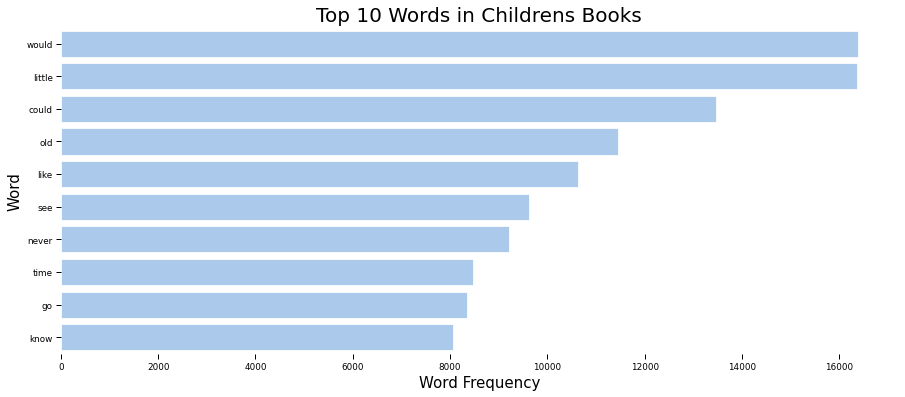

<Figure size 432x288 with 0 Axes>

In [353]:
df.iloc[10,4]

". The Prince and the Remora.If he had been too warm before, the prince was too cold now.The hill of the Remora was one solid mass of frozen steel, and the cold rushed out of it like the breath of some icy beast, which indeed it was.All around were things like marble statues of men in armour: they were the dead bodies of the knights, horses and all, who had gone out of old to fight the Remora, and who had been frosted up by him.The prince felt his blood stand still, and he grew faint; but he took heart, for there was no time to waste.Yet he could nowhere see the Remora. Hi! ''shouted the prince.Then, from a narrow chink at the bottom of the smooth, black hill, -- a chink no deeper than that under a door, but a mile wide, -- stole out a hideous head!It was as flat as the head of a skate-fish, it was deathly pale, and two chill-blue eyes, dead-coloured like stones, looked out of it.Then there came a whisper, like the breath of the bitter east wind on a winter day:  Where are you, and how